In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math


from utils import geometry as geo
from utils import data as dt
from utils import metrics as mt
# from rtree import index

# lets create a dataset of squares
# that do not intersect each other

# each square will be a vector of x, y, size, rotation
# init_square = np.array([x0, y0 , size0, rotation0])
# lets create a set of x and y positions
# create a x

Matplotlib is building the font cache; this may take a moment.


In [3]:
max_ = 300
size0 = np.random.randint(low=1, high=5, size = max_ - (3+1))
print(size0)

[1 1 3 2 1 1 1 3 4 3 2 2 2 1 3 3 3 4 3 1 2 3 2 1 4 1 2 1 3 4 4 2 1 3 2 3 4
 3 3 3 1 3 4 4 2 2 3 3 4 1 3 4 1 2 2 1 3 2 4 4 2 3 4 1 1 1 1 3 4 2 1 1 1 3
 1 4 2 4 3 3 2 3 3 3 2 1 3 2 4 3 4 2 3 2 1 4 2 2 1 1 1 4 4 2 2 4 2 4 3 2 3
 1 1 4 3 3 4 2 1 3 4 4 3 2 4 4 3 2 3 1 1 3 1 4 3 1 4 3 2 4 3 4 3 2 1 3 3 4
 3 2 3 4 2 4 3 2 3 3 1 2 3 3 2 3 2 4 4 3 3 3 2 4 2 1 2 1 1 4 3 4 3 1 1 2 3
 2 4 3 2 2 1 3 1 3 3 2 3 2 2 1 3 3 1 2 4 1 1 1 3 2 3 2 2 4 2 2 1 1 2 2 1 4
 4 4 2 2 4 1 3 2 2 1 2 2 4 3 3 3 2 1 2 4 4 4 3 4 1 1 4 3 4 1 4 1 1 2 2 1 1
 1 1 3 1 3 1 1 2 1 3 4 1 3 3 1 1 1 1 1 3 3 1 1 3 1 2 4 4 1 1 2 2 2 1 3 4 3]


In [10]:

#0 array from 0 to 1000 with step 2 

max_ = 300
step = 1
x0 = np.arange(3+1, max_, step)
print(np.shape(x0))
y0 = np.arange(3+1, max_, step)
print(np.shape(y0))
# lets create a set of sizes
# size0 = np.array([1, 2, 3, 4])
size0 = np.array([1, 2, 3, 4])
print(np.shape(size0))

# lets create a set of rotations
# rotation will be from 0 to 90 degrees
mu = [10, 25, 45, 66]
sigma = [5, 10, 15, 20]

num = 10000
rotation0 = dt.rotations(mu, sigma, num)
# print(np.shape(rotation0))
#square0 = np.array([x0,y0,size0,rotation0])

data = dt.create_data(num, x0, y0, size0, rotation0)
print("max rotation and min are: ", np.max(rotation0), np.min(rotation0))


(296,)
(296,)
(4,)


In [9]:
print(len(data))

1000


In [4]:
np.save('./data_v2/1000sq/1000sq_1_12.npy', data)

In [ ]:
# calculate how much space the data are taking from 0,0 to 300,300
# we will use the bounding box of the data
area_cov = 0
area_tot = 300*300

for i in range(len(data)):
    area_cov += data[i][2]**2

print("Density of the data is: ", area_cov/area_tot)
    

In [16]:
# load data
data = np.load('./data_v2/1000sq/1000sqv2.npy')
q_points = np.load('./data_v2/1000sq/1000qpv2.npy')

In [17]:
data.shape

(1000, 4)

In [5]:
q_points = dt.gen_qpoints(data, 10000)
print(q_points)

Number of points generated:  0
Number of points generated:  0
Number of points generated:  0
Number of points generated:  1000
Number of points generated:  2000
Number of points generated:  3000
Number of points generated:  3000
Number of points generated:  4000
Number of points generated:  5000
Number of points generated:  6000
Number of points generated:  6000
Number of points generated:  7000
Number of points generated:  8000
Number of points generated:  8000
Number of points generated:  9000
[[97, 234], [109, 8], [139, 151], [280, 283], [33, 9], [282, 150], [122, 71], [217, 190], [97, 49], [24, 133], [87, 234], [27, 235], [27, 29], [52, 236], [55, 179], [104, 285], [61, 77], [148, 5], [271, 137], [221, 211], [265, 250], [267, 230], [214, 115], [134, 274], [35, 209], [79, 267], [51, 162], [198, 61], [50, 71], [233, 185], [169, 34], [50, 257], [197, 219], [254, 265], [199, 38], [281, 34], [76, 197], [10, 94], [56, 205], [282, 154], [178, 267], [264, 259], [244, 28], [145, 281], [127,

In [6]:
np.save('./data_v2/1000sq/1000qp_1_12.npy', q_points)

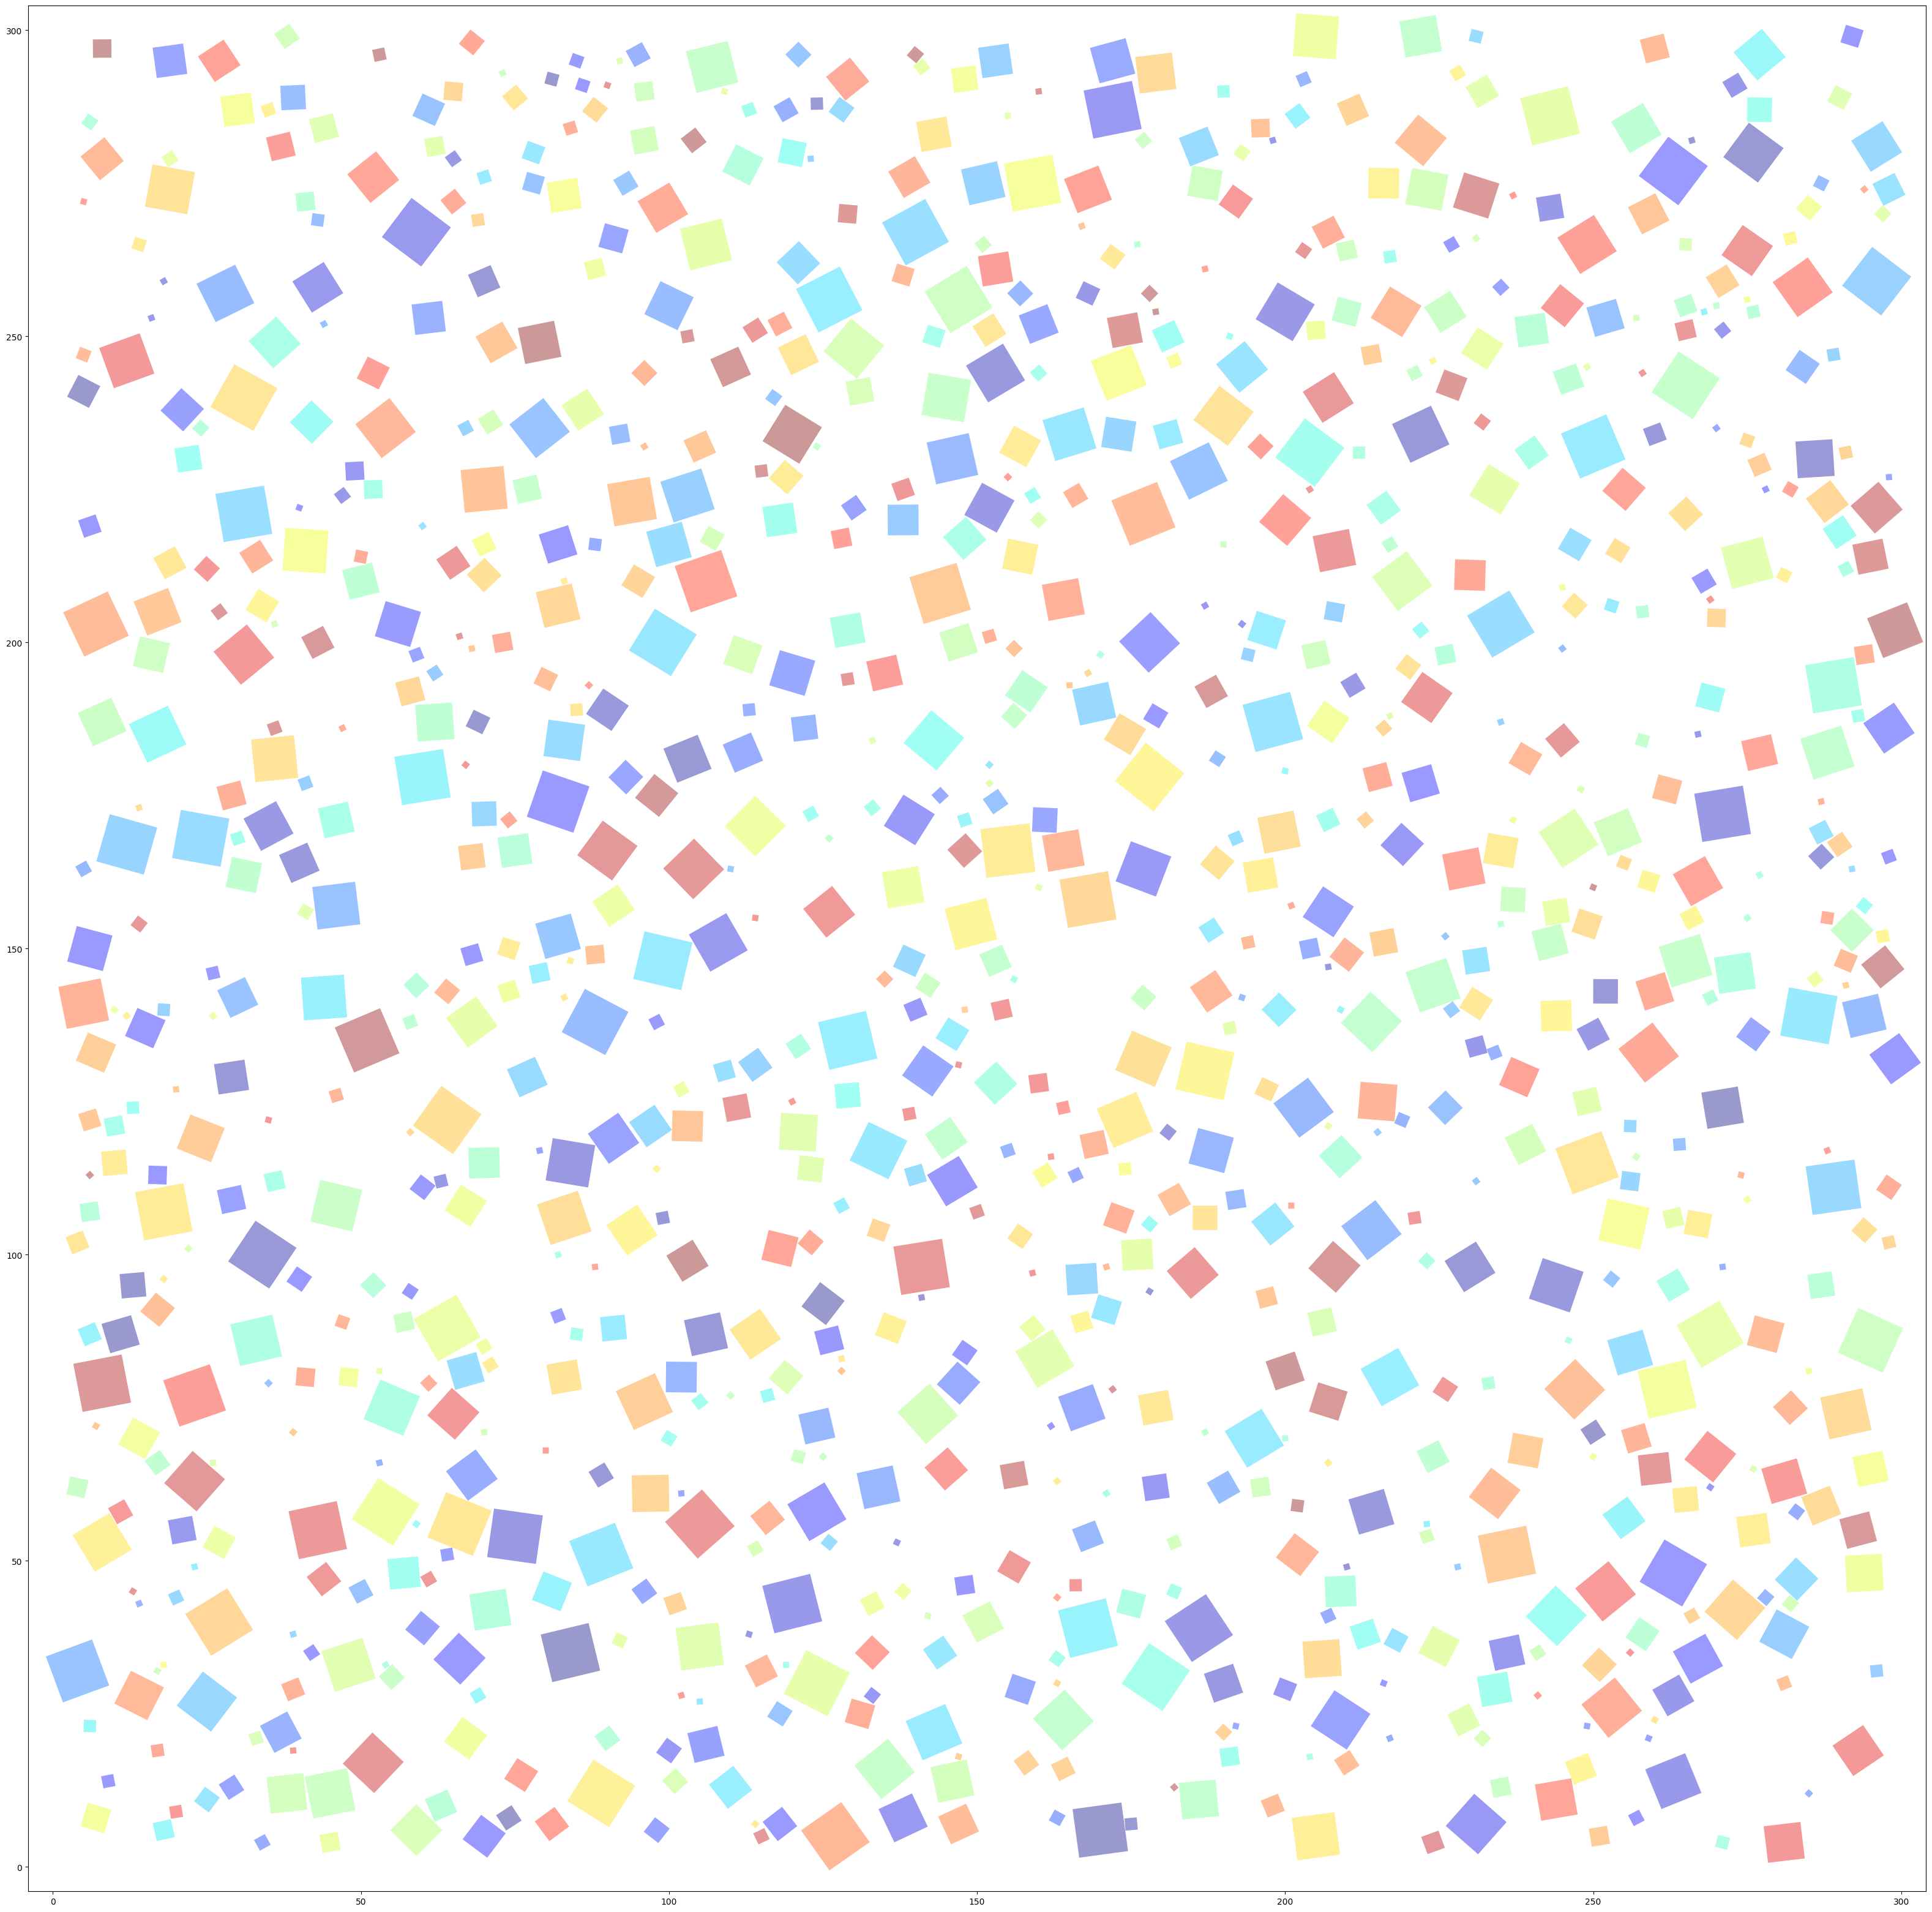

In [11]:
from utils import visualization as vis
min_ = 0
#vis.plot_data(data, 20, [- max_ - max(size0), max_ + max(size0), -max_ - max(size0) , max_ + max(size0)])
vis.plot_data(data,40,[0-4,300+4,0-4,300+4])

In [ ]:
kde = KernelDensity(kernel='gaussian', bandwidth=1.8).fit(data[:,-1].reshape(-1, 1))
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.001).fit(data.reshape(-1, 1))


In [ ]:
# plot histogram of rotations
data =np.array(data)
x_plot = np.linspace(0, 90, 1000)[:, np.newaxis]
plt.hist(data[:,3], bins=200, density=True,label='histogram of rotations')
x_d = np.linspace(0, 90, 1000)[:, np.newaxis]
log_density = kde.score_samples(x_d)
plt.plot(x_d[:, 0], np.exp(log_density), '-', label="KDE",color='red',linewidth=2)
# name axis
plt.xlabel('Rotation in degrees')
plt.ylabel('Density')
# put legend
plt.legend(loc='upper right')
# limit 
plt.xlim(0, 90)

plt.rcParams['figure.figsize'] = [10,5]

plt.show()
# save image as svg
plt.savefig('histogram_rotations.svg', format='svg', dpi=1200)

In [ ]:
# plot the before and after in same plot
fig, ax = plt.subplots()
x_d = np.linspace(0, 90, 1000)[:, np.newaxis]
log_dens = kde.score_samples(x_d)
log_dens1 = kde1.score_samples(x_d)
w = 360
ax.plot(x_d[:, 0], 4*w*np.exp(log_dens), '-', linewidth=2,color='red')
ax.plot(x_d[:, 0], 4*w*np.exp(log_dens1), '-', linewidth=1,color='blue',alpha=0.5)
#ax.hist(alpha, 50, fc='blue', histtype='stepfilled', alpha=0.2)
ax.set_xlim(0, 90)
ax.set_ylim(0, 60)
# legend
ax.legend( ('KDE', 'Input'), loc='upper right')
# name x axis
ax.set_xlabel('Rotation (degrees)')
plt.show()

In [ ]:
dataset = np.array(data)[:,-1]
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(dataset.reshape(-1, 1))
s = np.linspace(0,90)
e = kde.score_samples(s.reshape(-1,1))
plt.plot(s, e)

In [ ]:
data[:,-1]

In [18]:
from  sklearn.neighbors._kde import KernelDensity
from scipy.signal import argrelextrema
def GetBandwidth(data):
    # get bandwidth for kernel density estimation
    # bw must be limited by:
    # 1. it minimizes the distance between the maximum and mean of a cluster
    # 2. the distance between two cluster means is maximazied
    # or be chosen manually
    # or be chosen by cross validation
    # or so that the cluster's sizes are not too different from each other
    bandwidth = 0
    
  
    
    return bandwidth
def rclustering(dataset, bandwidth_method = 'opt'): 
    dataset = np.array(dataset)
    data = dataset[:,-1]
    if bandwidth_method == 'opt':
        bandwidth = GetBandwidth(data)
    else:
        bandwidth = float(bandwidth_method)
    #print("bandwidth: ", bandwidth)
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(data.reshape(-1, 1))
    s = np.linspace(0,90)
    e = kde.score_samples(s.reshape(-1,1))
    plt.plot(s, e)
    mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
    # print them
    #print("minima: ", s[mi])
    #print("maxima: ", s[ma])
    # create a np.array of the clusters
    # maximum length is one more than minimum
    clusters = []
    for i in range(mi.__len__()):
        temp = []
        if i == 0:
            for j in range(data.__len__()):
                if data[j] <= s[mi[i]]:
                    temp.append(dataset[j])
            clusters.append(np.array(temp))
            continue
        if i > 0 and i <= mi.__len__()-1:
            for j in range(data.__len__()):
                if data[j] <= s[mi[i]] and data[j] > s[mi[i-1]]:
                    temp.append(dataset[j])
            clusters.append(np.array(temp))
            if i == mi.__len__()-1:
                temp = []
                for j in range(data.__len__()):
                    if data[j] > s[mi[i]]:
                        temp.append(dataset[j])
                clusters.append(np.array(temp))
            continue
    print("number of clusters: ", clusters.__len__())
    return np.array(clusters), s[mi], s[ma]
                
# compress data and calculate error for each cluster
def compress_data(clusters, min, max):
    print("No of clusters: ", clusters.__len__())
    print("No of min and max points: ", min.__len__(), max.__len__())
    error = [0 for i in range (clusters.__len__())]
    
    for i in range(clusters.__len__()):
        maxima = np.max(clusters[i][:,-1])
        print("maxima: ", maxima)
        mean = np.mean(clusters[i][:,-1])
        print("mean: ", mean)
        # calculate error
        for j in range(clusters[i].__len__()):
            error[i] += (maxima - clusters[i][j][-1])
            clusters[i][j][-1] = mean 
    return clusters , error

# create a cost function for w_error and bandwidth, so that u choose bandwidth to minimize w_error
# w_error must take into  account the number of clusters, we dont want to have too many clusters or too few
def cost_function(bandwidth):
    clusters, min, max = rclustering(data, bandwidth_method = bandwidth)
    new_data , error = compress_data(clusters, min, max)
    print("error: ", error)
    w_error = 0
    n_error = []
    for i in range(error.__len__()):
        w_error += np.abs(error[i])
        n_error.append( error[i] / clusters[i].__len__())
    return w_error,n_error, error, clusters.__len__()

In [ ]:
# plot the cost function for bw from 0.1 to 90
#bw = np.arange(0.1,5 , 0.05)
bw = np.arange(1,5 , 0.05)
cost = []
for i in bw:
    cost.append(cost_function(i))
cost = np.array(cost)


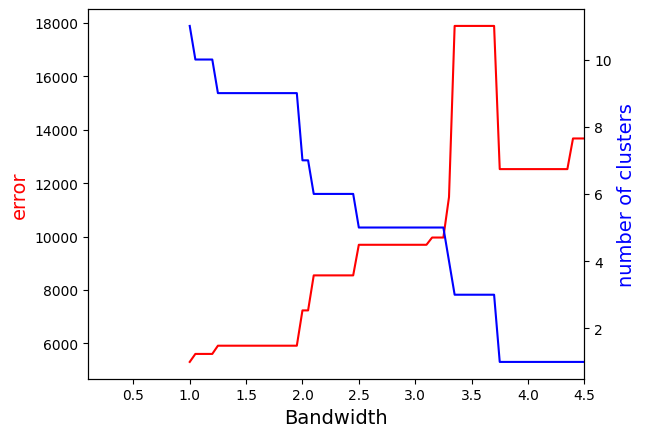

In [15]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(bw,
        cost[:,0],
        color="red")
# set x-axis label
ax.set_xlabel("Bandwidth", fontsize = 14)
# set y-axis label
ax.set_ylabel("error",color="red", fontsize = 14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(bw,
         cost[:,-1],
         color="blue")
ax2.set_ylabel("number of clusters",color="blue", fontsize = 14)
# put limits
ax.set_xlim(0.1, 4.5)
plt.show()

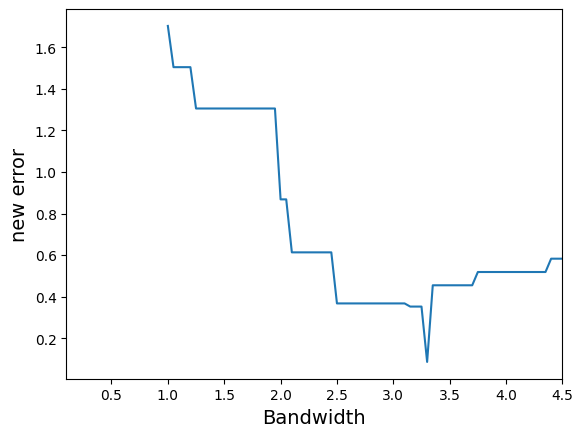

optimal bandwidth:  [3.3]


In [16]:
# convolute error and number of clusters to get a cost function
y1 = cost[:,0]
y1_max = np.max(y1)
y2 = cost[:,-1]
y2_max = np.max(y2)
y1_norm = y1 / y1_max
y2_norm = y2 / y2_max
#y = np.convolve(y1, y2, mode='same')
#y3 = (y1**2) * (y2**3)
#plt.plot(bw, y)
#plt.plot(bw, y3)
# y2 is more important than y1
y2_weight =2
d = abs(y1_norm - y2_weight*y2_norm)
fig,ax = plt.subplots()
ax.plot(bw, d)
ax.set_xlabel("Bandwidth", fontsize = 14)
ax.set_ylabel("new error", fontsize = 14)
ax.set_xlim(0.1, 4.5)
plt.show()
a = np.where(d == np.min(d))
print("optimal bandwidth: ", bw[a])

number of clusters:  5
No of clusters:  5
No of min and max points:  4 5
maxima:  21.714893433834
mean:  11.96183583791925
maxima:  40.338661648074265
mean:  30.527047616185044
maxima:  60.51857282708911
mean:  50.28788078536618
maxima:  78.25848678301787
mean:  68.52109086596613
maxima:  89.64672083442517
mean:  83.94270147287627


/tmp/ipykernel_4233/405164238.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(clusters), s[mi], s[ma]


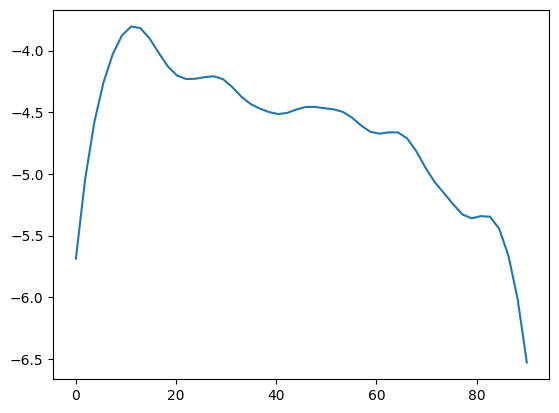

In [17]:
cluster,min_, max_ = rclustering(data, bandwidth_method = 3)
clusters, error = compress_data(cluster, min_, max_)
#clusters = cluster

In [ ]:
data[:,-1]

In [ ]:
# create histogram of rotations
plt.hist(data[:,-1], bins = 100)
plt.show()

In [18]:
# number of spaces is equal to number of clusters
print("number of spaces: ", clusters.__len__())
# space rotation is equal to the mean of the cluster
for i in range(clusters.__len__()):
    print("space rotation: ", np.mean(clusters[i][:,-1]))

number of spaces:  5
space rotation:  11.961835837919253
space rotation:  30.527047616185033
space rotation:  50.28788078536616
space rotation:  68.52109086596614
space rotation:  83.94270147287627


In [ ]:
Sr = [clusters[i][0,-1] for i in range(clusters.__len__()) ]

In [23]:
clusters[0].__len__()

356

In [ ]:
q_points = 

In [ ]:
# lets find nearest neighbour.
def distance_from_rectangle(point, square):
    x0 = point[0]
    y0 = point[1]
    px0 = square[0]
    py0 = square[1]
    w = square[2]
    h = square[3]
    #pl = square[2]
    dist = 0
    distx=0
    disty=0
    # distance for l = 0
    dx = px0 - x0
    dy = py0 - y0
    # distance for l = pl
    dxl= dx + w
    dyl= dy + h
    cases = [dx>0,dx<0,dy>0,dy<0,dxl>0,dxl<0,dyl>0,dyl<0]
    # check x axis first
    if dxl < 0:
        distx = abs(dxl)
    elif dx > 0:
        distx = abs(dx)
    else:
        distx = 0

    # check y axis
    if dyl < 0:
        disty = abs(dyl)
    elif dy > 0:
        disty = abs(dy)
    else:
        disty = 0
    
    dist = np.sqrt(distx**2 + disty**2)
    return dist

def dist_rsq(point, square):
    # rotate the point
    point = rotate_point([square[0],square[1]],point, np.deg2rad(square[-1]))
    #print("point: ", point)
    dist = distance_from_rectangle(point, square)
    return dist
def get_deg(p1, p2):
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    if x1 == x2:
        if y1 > y2:
            return 90
        else:
            return 270
    else:
        m = (y2-y1)/(x2-x1)
        #print("m: ", m)
        deg = np.rad2deg(np.arctan(m))
        if x1 > x2:
            deg += 180
        elif y1 > y2:
            deg += 360
        return deg
def rotate_point(init_point, point, theta):
    if np.all(init_point == point):
        return point

    else:
        x0 = init_point[0]
        y0 = init_point[1]
        x1 = point[0]
        y1 = point[1]
        theta_0 = np.deg2rad(get_deg(init_point, point))
        theta_r = theta
        theta_1 = theta_0 - theta_r
        #print("theta_0: ", theta_0)
        #print("theta_r: ", theta_r)
        #print("theta_1: ", theta_1)
        dist = np.sqrt((x0-x1)**2 + (y0-y1)**2)
        pr = np.rad2deg(theta_1)
        if pr>=0 and pr<=90:
            prx = 1
            pry = 1
        elif pr>90 and pr<=180:
            prx = -1
            pry = 1
        elif pr>180 and pr<=270:
            prx = -1
            pry = -1
        else:
            prx = 1
            pry = -1

        #print("dist: ", dist)
        x1_r = x0 +prx* dist/(np.sqrt(1+np.tan(theta_1)**2))
        #print("x1_r: ", x1_r)

        y1_r = y0 +pry* np.sqrt(dist**2 - (x1_r-x0)**2)
        #print("y1_r: ", y1_r)
        return [x1_r, y1_r]
    
    
def bf_nn_rects(data, point):
    min_dist = 100000
    min_index = 0
    for i in range(data.__len__()):
        dist = dist_rsq(point, data[i])
        if dist < min_dist:
            min_dist = dist
            min_index = i
    return min_index, min_dist


In [ ]:
# lets find the distance of a point from a square
# get distance of a point from a non axis aligned square
def distance_from_square(point, square):
    x0 = point[0]
    y0 = point[1]
    px0 = square[0]
    py0 = square[1]
    pl = square[2]
    dist = 0
    distx=0
    disty=0
    # distance for l = 0
    dx = px0 - x0
    dy = py0 - y0
    # distance for l = pl
    dxl= dx + pl
    dyl= dy + pl
    cases = [dx>0,dx<0,dy>0,dy<0,dxl>0,dxl<0,dyl>0,dyl<0]
    # check x axis first
    if dxl < 0:
        distx = abs(dxl)
    elif dx > 0:
        distx = abs(dx)
    else:
        distx = 0

    # check y axis
    if dyl < 0:
        disty = abs(dyl)
    elif dy > 0:
        disty = abs(dy)
    else:
        disty = 0
    
    dist = np.sqrt(distx**2 + disty**2)
    return dist



def rotate_square(square):
    pl = square[-2]
    theta = np.deg2rad(square[-1])
    pl_new = pl * np.cos(theta)
    return [square[0], square[1], pl_new, square[-1]]
# get deg of 2 points
def get_deg(p1, p2):
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    if x1 == x2:
        if y1 > y2:
            return 90
        else:
            return 270
    else:
        m = (y2-y1)/(x2-x1)
        #print("m: ", m)
        deg = np.rad2deg(np.arctan(m))
        if x1 > x2:
            deg += 180
        elif y1 > y2:
            deg += 360
        return deg
def bf_nn(data, point):
    min_dist = 100000
    min_index = 0
    for i in range(data.__len__()):
        dist = dist_rsq(point, data[i])
        if dist < min_dist:
            min_dist = dist
            min_index = i
    return min_index, min_dist
def dist_rsq(point, square):
    # rotate the point
    point = rotate_point([square[0],square[1]],point, np.deg2rad(square[-1]))
    #print("point: ", point)
    dist = distance_from_square(point, square)
    return dist

def rotate_point(init_point, point, theta):
    if np.all(init_point == point):
        return point

    else:
        x0 = init_point[0]
        y0 = init_point[1]
        x1 = point[0]
        y1 = point[1]
        theta_0 = np.deg2rad(get_deg(init_point, point))
        theta_r = theta
        theta_1 = theta_0 - theta_r
        #print("theta_0: ", theta_0)
        #print("theta_r: ", theta_r)
        #print("theta_1: ", theta_1)
        dist = np.sqrt((x0-x1)**2 + (y0-y1)**2)
        pr = np.rad2deg(theta_1)
        if pr>=0 and pr<=90:
            prx = 1
            pry = 1
        elif pr>90 and pr<=180:
            prx = -1
            pry = 1
        elif pr>180 and pr<=270:
            prx = -1
            pry = -1
        else:
            prx = 1
            pry = -1

        #print("dist: ", dist)
        x1_r = x0 +prx* dist/(np.sqrt(1+np.tan(theta_1)**2))
        #print("x1_r: ", x1_r)

        y1_r = y0 +pry* np.sqrt(dist**2 - (x1_r-x0)**2)
        #print("y1_r: ", y1_r)
        return [x1_r, y1_r]
    
    
def bf_nn(data, point):
    min_dist = 100000
    min_index = 0
    for i in range(data.__len__()):
        dist = dist_rsq(point, data[i])
        if dist < min_dist:
            min_dist = dist
            min_index = i
    return min_index, min_dist


def create_points(num, x0, y0):
    points = []
    for i in range(num):
        x = np.random.randint(x0[0],x0[1])
        y = np.random.randint(y0[0],y0[1])
        points.append([x, y])
    return points

def arrange_data(data):
    tup = []
    for i in range(data.__len__()):
        tup.append((data[i][0], data[i][1], data[i][0]+data[i][2], data[i][1]+data[i][2]))
    
    return tup
def NNRTREE(idx, point, data,k):
    result = list(idx.nearest((point[0], point[1],point[0], point[1]), k))
    sq = [data[result[i]] for i in range(result.__len__())]
    dist = [dist_rsq(point, data[result[i]]) for i in range(sq.__len__())]

    #sq = []
    #dist = []
    #for i in range(result.__len__()):
    #    sq.append(data[result[i]])
    #    dist.append(dist_rsq(point, data[result[i]]))
    #dist = distance(point, sq)
    return result, dist, sq

In [ ]:
data[0]

In [ ]:
NNRTREE(idx[0], points[0], clusters[0], 3)[0]

In [ ]:
arrange_data(clusters[0])

In [ ]:
# we are gonna create an Rtree with the data as bounding boxes of ids and the data
idx = [None for _ in range(clusters.__len__())]
for i in range(clusters.__len__()):
    idx[i] = index.Index()
    data_new = arrange_data(clusters[i])
    
    for j in range(data_new.__len__()):
        # create tuple
        tup = (data_new[j][0], data_new[j][1], data_new[j][2], data_new[j][3])
        idx[i].insert(j, tup)
print(idx)

In [ ]:
# test index with no clusters
idx = index.Index()
data_new = arrange_data(data)
for i in range(data.__len__()):
    tup = (data_new[i][0], data_new[i][1], data_new[i][2], data_new[i][3])
    idx.insert(i, tup)

print(idx)
if idx.__len__ == 1:
    idx = [idx]
    

In [ ]:
points_tot = np.load('million_random_query_points.npy')
print("points_tot.shape", points_tot.shape)
# load bf results or 1k data
sq_bf= np.load("sq_bf.npy")
sq_bf.shape

In [ ]:
points_tot = np.load('qp10k.npy')
print("points_tot.shape", points_tot.shape)
# load bf results or 1k data
sq_bf= np.load("sq_bf10k.npy")
sq_bf.shape

In [ ]:
clusters=data

In [ ]:
# lets see accuracy
num_of_points = 10000
points = points_tot[:num_of_points]
acc = 0
dd = []
dt = []

for p in range(len(points)):
    #val = False
    sq = []
    for i in range(clusters.__len__()):
        cnt = NNRTREE(idx[i], points[p],clusters[i], 1)[0][0]
        sq.append(clusters[i][cnt])
    # do brute force search
    ind_bf = bf_nn_rects(data, points[p])[0]
    sq_b = data[ind_bf]
    # get accuracy
    
    #print("sq_b: ", sq_b)
    #print("sq: ", sq)
    for j in range(len(sq)):
        if np.all(sq[j][0:-1] == sq_b[0:-1]):
            acc += 1

            #val = True
    #if val == False:
    #    print("=======================================")
    #    print("No match found")
    #    print("Brute force square is ",sq_bf)
    #    print("Squares are",sq)
    #print("=======================================")
            
print("Accuracy is", acc/num_of_points*100, "%")
    


In [ ]:
# lets see accuracy
num_of_points = 10000
points = points_tot[:num_of_points]
acc = 0
for p in range(len(points)):
    #val = False
    sq = []
    for i in range(1):
        cnt = NNRTREE(idx, points[p],clusters, 1)[0][0]
        sq.append(clusters[cnt])
    # do brute force search
    ind_bf = bf_nn_rects(data, points[p])[0]
    sq_b = data[ind_bf]
    # get accuracy
    
    #print("sq_b: ", sq_b)
    #print("sq: ", sq)
    for j in range(len(sq)):
        if np.all(sq[j][0:-1] == sq_b[0:-1]):
            acc += 1
            #val = True
    #if val == False:
    #    print("=======================================")
    #    print("No match found")
    #    print("Brute force square is ",sq_bf)
    #    print("Squares are",sq)
    #print("=======================================")
            
print("Accuracy: ", acc)
print("Accuracy is", acc/num_of_points*100, "%")
    


In [ ]:
sq

In [ ]:
np.all(sq[1][0:-1] == sq_b[0:-1])

In [ ]:
#95.02% accuracy
sq_bf[0]

In [ ]:
sq

In [ ]:
data[bf_nn(data, points_tot[0])[0]]

In [ ]:
t1 = time.time()
for p in points_tot:
    for i in range(clusters.__len__()):
        NNRTREE(idx[i], p,clusters[i], 1)
t2 = time.time()
print("Time taken for 1M points is", t2-t1, "seconds")

In [ ]:
264.61/60

In [ ]:
%%timeit
#import time
# get nearest neighbor
#poi = points[:10000]
#acc = 0
#t1 = time.time()
for p in poi:
    # find the nearest neighbor
    #min_index, min_dist = bf_nn(data, p)
    #print(min_index, min_dist)
    #print(data[min_index])
    #print(p)
    #print(dist_rsq(p, data[min_index]))
    #print(dist_rsq(p, data[min_index]))
    #print(distance(p, data[min_index]))
    #print(distance(p, data[min_index]))
    #print("")

    # find the nearest neighbor with rtree
    result, dist, sq = NNRTREE(idx, p, data, 1)
    #print(result, dist, sq)
    #print(min_index, min_dist)
    #if result[0] == min_index:
    #    acc += 1
#print("Accuracy: ", acc/poi.__len__()*100)


In [ ]:

import visualization as vis
min_ = 0
#vis.plot_data(data, 20, [- max_ - max(size0), max_ + max(size0), -max_ - max(size0) , max_ + max(size0)])
vis.plot_data(data,40,[0,300,0,300])

In [ ]:
NNRTREE(idx[0], [100,100], clusters[0], 3)

In [ ]:
points 

In [ ]:
points.__len__()

In [ ]:
# create a set of points
num = 10000
points = create_points(num, [0,300], [0,300])
#points =[[100,100]]
 

In [ ]:
# take 1000 random points from points
def select_batch(points, num):
    batch = []
    for i in range(num):
        batch.append(points[np.random.randint(0, points.__len__())])
    return batch

In [ ]:
# load random_query_points
points = np.load('million_random_query_points.npy')
# create a batch with 1000 points
#points = select_batch(points, 1000)

In [ ]:
# load random_query_points
#points = np.load('million_random_query_points.npy')[0:1000]
# create a batch with 1000 points

points = points_tot[0:1000]
idbf = np.zeros((points.__len__(),2))
idnn = []
acc = 0
knn = 1
dd = []
dt = []
dd_r = []
dt_r = []
theta_r = []
theta = []
for i in range(points.__len__()):
    #print("=======================================")
    bf_id, bf_dis = bf_nn_rects(data, points[i])
    bf_sq = data[bf_id]
    #print(bf_sq)
    nn_dis_t = []
    nn_sq_t = []
    for j in range(clusters.__len__()):
        nn_id , nn_dis, nn_sq = 0,0,0
        #print(NNRTREE(idx[j], points[i], clusters[j], k))
        nn_id, nn_dis, nn_sq = NNRTREE(idx[j], points[i], clusters[j], knn)
        #print(nn_sq)
        for k in range(nn_dis.__len__()):
            nn_dis_t.append(nn_dis[k])
            nn_sq_t.append(nn_sq[k])
    stop = 0
    # search if the bf is in the nn
    la = 0
    
    for j in range(nn_sq_t.__len__()):
        if stop == 1:
            continue
        la +=1
        a = bf_sq[0:-1]
        b = nn_sq_t[j][0:-1]
        
        
        #print(a,b)
        if np.all(a==b):
            dd.append(abs((bf_dis - nn_dis_t[j])/bf_dis))
            dt.append(abs((bf_sq[-1] - nn_sq_t[j][-1]))*np.sqrt(b[-1]**2 + b[-2]**2))
            theta.append(bf_sq[-1])
            #print("la: ", la)
            #print("la per cluster: ", la%3)
            acc += 1
            stop = 1
    if stop == 0:
        min_dist_r = np.min(nn_dis_t)
        dd_r.append(abs(min_dist_r - bf_dis))
        theta_r.append(nn_sq_t[np.where(nn_dis_t == min_dist_r)[0][0]][-1])
        dt_r.append(abs(theta_r[-1] - bf_sq[-1])*bf_sq[2])
        
    
    #print("=======================================")
            
       
            
            

# print percentage of acc
print("Accuracy is {}%".format(acc/points.__len__()*100))


# Results

In [ ]:
# remove infs and nans from dd and dt
dd = [x for x in dd if not np.isnan(x)]
dd = [x for x in dd if not np.isinf(x)]
dt = [x for x in dt if not np.isnan(x)]
dt = [x for x in dt if not np.isinf(x)]

In [ ]:

# plot dt as x and dd as y as a line graph with limits on the axes
import matplotlib.pyplot as plt
plt.plot(dt, dd, 'ro')
plt.axis([0, 0.5, 0, 0.5])
plt.show()

In [ ]:
# sort the dt and dd by dt
dt, dd = zip(*sorted(zip(dt, dd)))
plt.plot(dt, dd)
plt.axis([0,40,0,5])
# show y name and x name
plt.ylabel('Delta Distance')
plt.xlabel('Delta Theta * Size')

plt.show()
# plot the integral of dd as a function of dt
# fit data to a line
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

    

# define the true objective function
def objective(x, a, b, c, d):
	return a * np.sin(b - x) + c * x**2 + d

# generate input data
xdata = np.array(dt)
ydata = np.array(dd)
# curve fit
popt, _ = curve_fit(objective, xdata, ydata)
# summarize the parameter values
a, b, c, d = popt
print('y = %.5f * np.sin(%.5f - x) + %.5f * x**2 + %.5f' % (a, b, c, d))
# plot input vs output
# put limits in scatter
plt.scatter(xdata, ydata)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(xdata), max(xdata), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
# put names on the axes
plt.ylabel('Delta Distance')
plt.xlabel('Delta Theta * Size')
plt.show()




In [ ]:
plt.plot(dt, dd)
dt_r, dd_r = zip(*sorted(zip(dt_r, dd_r)))
#plt.plot(dt_r,dd_r,color = 'red')
plt.scatter(dt_r,dd_r,color = 'red')
plt.axis([0,35,0,3])
# show y name and x name
plt.ylabel('Delta Distance')
plt.xlabel('Delta Theta * Size')

plt.legend(['Correct Predictions','False Predictions'])
plt.show()

In [ ]:
# plot dd as a function of dt 
plt.scatter(dt, dd)
# plot wrongs as scatter with different color
plt.scatter(dt_r, dd_r, color='red')
plt.show()

In [ ]:
# plot dd as a function of theta
# and dt as a function of theta
# first sort the data by theta
theta_, dd_ = zip(*sorted(zip(theta, dd)))
theta_, dt_ = zip(*sorted(zip(theta, dt)))
# plot wrongs too

plt.plot(theta_, dd_)
# set limits on the axes 
plt.axis([0, 90, 0, 3])
# set x and y names
plt.ylabel('Delta Distance')
plt.xlabel('Theta')
plt.show()

plt.plot(theta_, dt_)
plt.ylabel('Delta Theta * Size')
plt.xlabel('Theta')
plt.show()

